In [43]:
import numpy as np

def find_max_abs(Z):
    ZZ = []
    for i in range(len(Z)):
        ZZ.append(abs(Z[i]))
    return max(ZZ)

def find_MSE(X, Y):
    #нормировка для сходимости
    x = np.array(X)
    y = np.array(Y)
    print(x)
    print(y)
    #начальный прогноз
    k1 = 1.5
    b1 = 1.0
    #y = k*x+b
    #y = k*x[i]+b
    
    #шаг выбирается,чтобы метод сходился
    alpha = 0.1/max(find_max_abs(X), find_max_abs(Y))
    #погрешность
    e = 1e-4
 
    vect= np.array([k1, b1])
    
    for i in range(len(x)):
        grad_MSE = np.array([0.0,0.0])
        grad_k = 2*x[i]*(vect[0]*x[i]+vect[1] - y[i])
        grad_b = 2*(vect[0]*x[i]+vect[1] - y[i])
        grad_MSE += 1/len(x)*np.array([grad_k, grad_b])
    vect = vect - alpha*grad_MSE
    
    while(alpha*np.linalg.norm(grad_MSE) > e):  
        
        grad_MSE = np.array([0.0,0.0])
        for i in range(len(x)):
            grad_k = 2*x[i]*(vect[0]*x[i]+vect[1] - y[i])
            grad_b = 2*(vect[0]*x[i]+vect[1] - y[i])
            grad_MSE += 1/len(x)*np.array([grad_k, grad_b])
        vect = vect - alpha*grad_MSE
    
    return vect

In [44]:
def plot_MSE(X, Y):
    import matplotlib.pyplot as plt
    vect = find_MSE(X, Y)
    plt.scatter(X, Y)
    plt.plot([min(X), max(X)],[min(X)*vect[0]+vect[1], max(X)*vect[0]+vect[1]])
    plt.show()

[  1   2   4   9 -10]
[  8   9   4   1 100]
vect= [ -5.62163039  31.09615255]


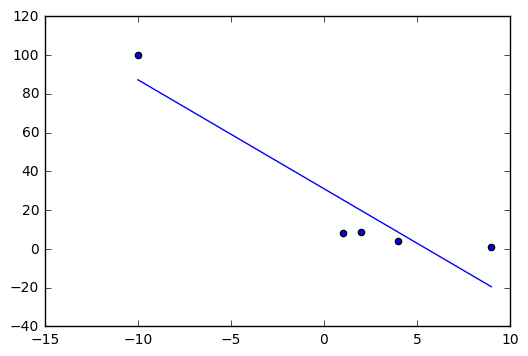

In [45]:
X = [1,2,4,9, -10]
Y = [8,9,4, 1, 100]
plot_MSE(X,Y)